In [524]:
import pandas as pd
import numpy as np

In [525]:
df=pd.read_csv('power_plant.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [526]:
tabel=[]


for i in df.columns:
    tabel.append([i,df[i].nunique(),df[i].drop_duplicates().values])
    
pd.DataFrame(tabel,columns=['Features','Unique_Number','Values'])

,Features,Unique_Number,Values
0,country,1,[IND]
1,country_long,1,[India]
2,name,908,"[ACME Solar Tower, ADITYA CEMENT WORKS, AES Sa..."
3,gppd_idnr,908,"[WRI1020239, WRI1019881, WRI1026669, IND000000..."
4,capacity_mw,365,"[2.5, 98.0, 39.2, 135.0, 1800.0, 250.0, 60.0, ..."
5,latitude,837,"[28.1839, 24.7663, 21.9038, 23.8712, 21.9603, ..."
6,longitude,828,"[73.2407, 74.609, 69.3732, 91.3602, 82.4091, 6..."
7,primary_fuel,8,"[Solar, Coal, Wind, Gas, Hydro, Biomass, Oil, ..."
8,other_fuel1,3,"[nan, Oil, Cogeneration, Gas]"
9,other_fuel2,1,"[nan, Oil]"


Above  Table give some formal idea about the datasets.

In [527]:
df.duplicated().sum()

0

No Any Duplicates Data Are Present.

In [528]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]
print(len(missing_features))
missing_features

17


['latitude',
 'longitude',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_data_source',
 'estimated_generation_gwh']

In [529]:
for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

latitude 5.0661 % missing values
longitude 5.0661 % missing values
other_fuel1 78.0837 % missing values
other_fuel2 99.8899 % missing values
other_fuel3 100.0 % missing values
commissioning_year 41.8502 % missing values
owner 62.3348 % missing values
geolocation_source 2.0925 % missing values
wepp_id 100.0 % missing values
year_of_capacity_data 42.7313 % missing values
generation_gwh_2013 57.7093 % missing values
generation_gwh_2014 55.837 % missing values
generation_gwh_2015 53.1938 % missing values
generation_gwh_2016 51.8722 % missing values
generation_gwh_2017 51.2115 % missing values
generation_data_source 50.4405 % missing values
estimated_generation_gwh 100.0 % missing values


In this Data 17 features having missing values. and from than

01) 04 columns having 100% missing values.

02) 07 columns having 50-78% missing values.

03) remaining having 0-10& missing values.

We will fill this Nan values after data analysis.

In [530]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Length Of Numeric Features',len(numeric_features))
numeric_features

Length Of Numeric Features 13


['capacity_mw',
 'latitude',
 'longitude',
 'other_fuel3',
 'commissioning_year',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'estimated_generation_gwh']

In [531]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print("Lenth Of Categorical Features",len(categorical_features))
categorical_features

Lenth Of Categorical Features 12


['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [532]:
year_features=[features for features in numeric_features if 'year' in features]
print('Length Of Year_Feature',len(year_features))
year_features

Length Of Year_Feature 2


['commissioning_year', 'year_of_capacity_data']

In [533]:
discreat_features=[features for features in numeric_features if len(df[features].unique())<25 and features not in year_features]
print('Length Of Discreat Features',len(discreat_features))
discreat_features

Length Of Discreat Features 3


['other_fuel3', 'wepp_id', 'estimated_generation_gwh']

In [534]:
continues_features=[features for features in numeric_features if len(df[features].unique())>25 and features not in year_features]
print('Length Of Continue_Features',len(continues_features))
continues_features

Length Of Continue_Features 8


['capacity_mw',
 'latitude',
 'longitude',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [535]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'No Of Plants')

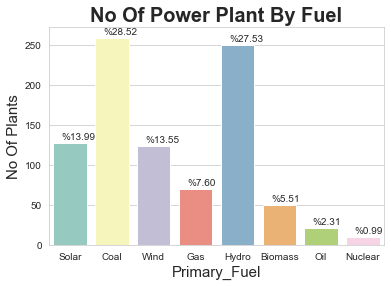

In [536]:
sns.set_style('whitegrid')
ax=sns.countplot(x=df['primary_fuel'],data=df,palette='Set3')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/908*100), (p.get_x()+0.2, p.get_height()+5))
plt.title('No Of Power Plant By Fuel',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel("Primary_Fuel",fontsize=15)
plt.ylabel('No Of Plants',fontsize=15)

Coal base power plantand Hydro base are high and nuclear basae power plant are low.

Text(0, 0.5, 'commissioning_year')

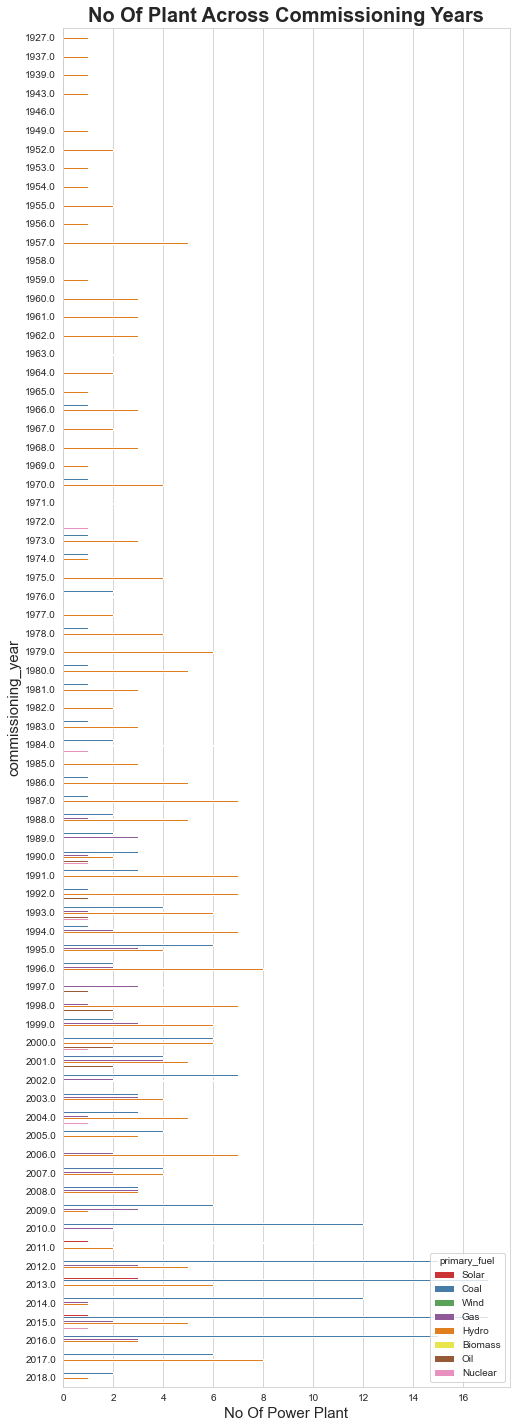

In [537]:
plt.figure(figsize=(8,25))
sns.countplot(y=df['commissioning_year'],palette='Set1',hue=df['primary_fuel'],data=df)
plt.title('No Of Plant Across Commissioning Years',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel("No Of Power Plant",fontsize=15)
plt.ylabel('commissioning_year',fontsize=15)

In [538]:
ab=pd.crosstab(df['commissioning_year'],df['primary_fuel'])
ab

primary_fuel,Coal,Gas,Hydro,Nuclear,Oil,Solar
commissioning_year,,,,,,
1927.0,0,0,1,0,0,0
1937.0,0,0,1,0,0,0
1939.0,0,0,1,0,0,0
1943.0,0,0,1,0,0,0
1946.0,0,0,1,0,0,0
...,...,...,...,...,...,...
2014.0,12,1,1,0,0,3
2015.0,17,2,5,1,0,1
2016.0,15,3,3,0,0,0


From This Chart we can see that india started their Hydro plant in  1927.

From 1927 to 1965 we have only Hydro power plan and also in less no of plant.

First coal plant start on 1966

First Nuclear Plant was start on 1972

Gas Plant start on 1989

We had done max commising of plant in 2013 is around 28 plant.about 02 plant in one month.

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

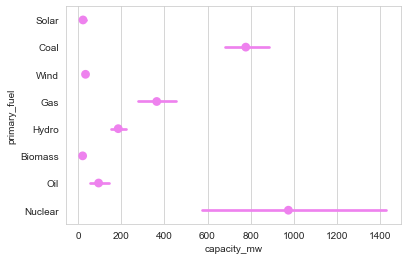

In [539]:
sns.pointplot(y=df['primary_fuel'],x=df['capacity_mw'],data=df,color='violet',join=False)

Nucler power plant having high capacity from (600-1400mw) and solar,Biomass having less.

Text(0.5, 1.0, 'Geolocation Source')

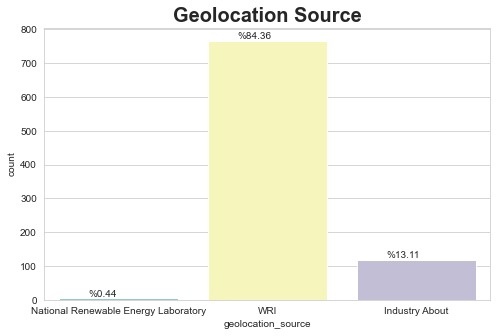

In [540]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax=sns.countplot(x=df['geolocation_source'],data=df,palette='Set3')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/908*100), (p.get_x()+0.2, p.get_height()+5))
sns.set_style('whitegrid')
plt.title('Geolocation Source',fontdict={'fontweight':'bold','fontsize':20})

Most of the Geolocation Source are coming from WRI Geolocation_source.as this features have  about 2.0% data missing so we will 
put most frequently used.as its used mostly.

<AxesSubplot:xlabel='other_fuel2', ylabel='count'>

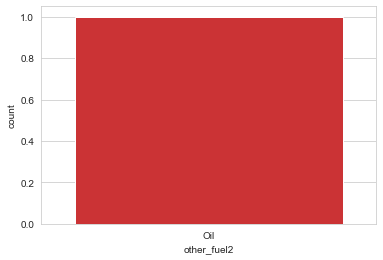

In [541]:
sns.countplot(x=df['other_fuel2'],data=df,palette='Set1')

other Fuel2 having only one type but it has 99% nan values so in data cleaning we will drop this.

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

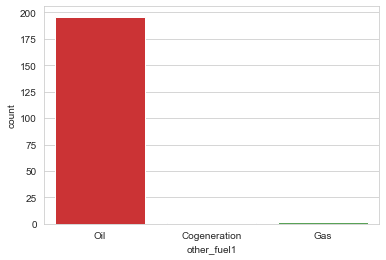

In [542]:
sns.countplot(x=df['other_fuel1'],data=df,palette='Set1')

From Above 2 chart we can see that Other fuel they are using Oli mostly so we will fill nuall values with that Oil in OtherFule1.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

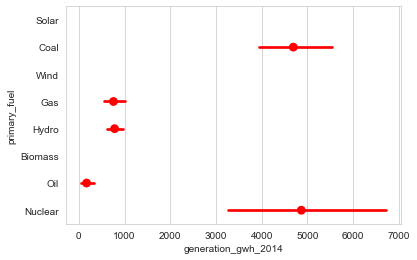

In [546]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2014'],data=df,color='red',join=False)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

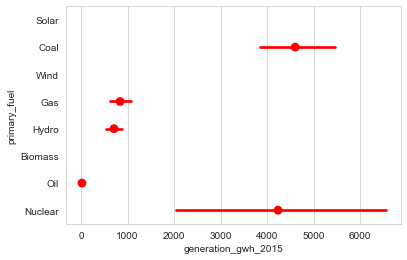

In [547]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2015'],data=df,color='red',join=False)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

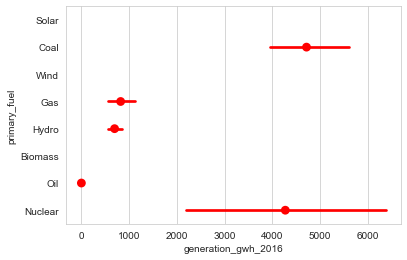

In [548]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2016'],data=df,color='red',join=False)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

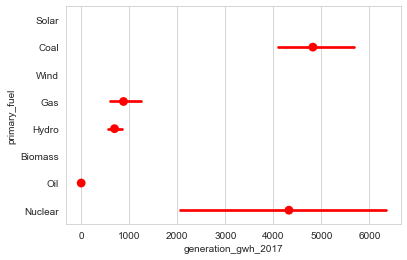

In [550]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2017'],data=df,color='red',join=False)

From Above charts we can say that ,

In 2016 Capacity Of Nuclear power plant(+7000mw) is highest as compair with other years.

In 2017 Coal plant running with highest capacity

Text(0.5, 1.0, 'Generation Data Source')

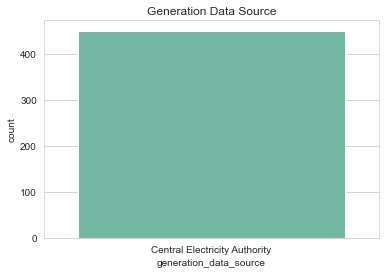

In [551]:
sns.countplot(x=df['generation_data_source'],data=df,palette='Set2')
plt.title('Generation Data Source')

All Power Generation Sources Comes from CEA so we will fill the 50% with that.

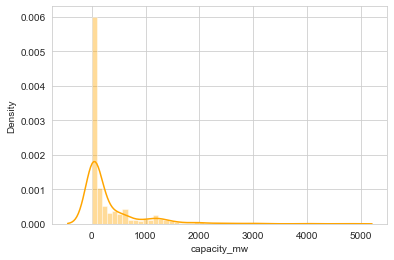

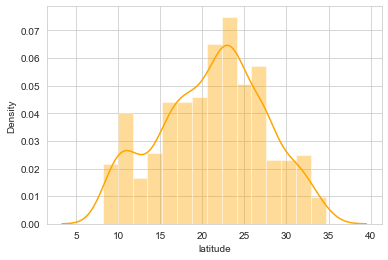

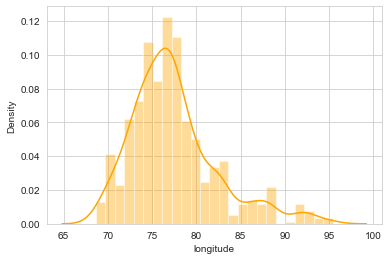

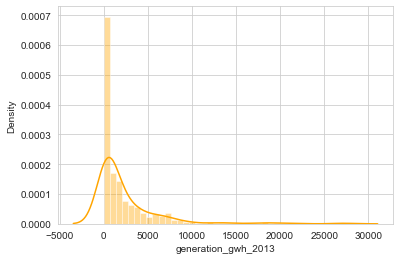

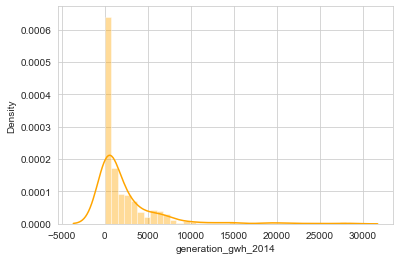

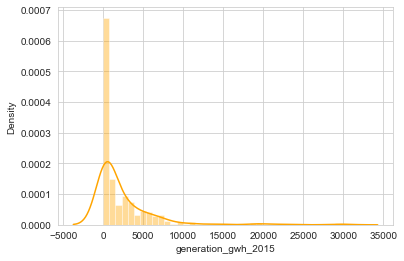

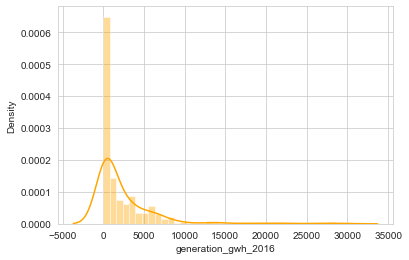

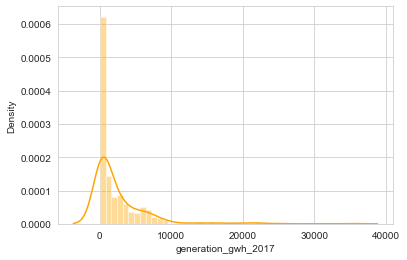

In [552]:
for i in continues_features:
    plt.figure()
    sns.distplot(df[i],color='orange')

Chart indicated skewness is present in dataset.

In [553]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


From Statastical We observe that mean of power generation increases from 2013 to 2017.that show that power demand also increases.

Max Capacity is 4760mw and average is 321mw.

As some features having 100% Null Values so we will drop than and also some un-necessary featurs we drop them.

In [554]:
df.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','country','country_long','gppd_idnr','owner','url','year_of_capacity_data'],axis=1,inplace=True)

Text(0.5, 1.0, 'Co Relation Chart')

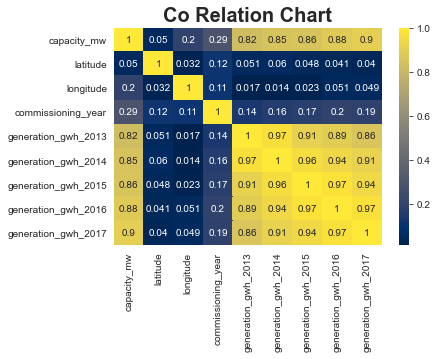

In [555]:
corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap='cividis')
plt.title("Co Relation Chart",fontdict={'fontweight':'bold','fontsize':20})

From this Corelation chart we see that some features having high relation and having multi linearity.

lattitude and longitude having less relation with capacity.

# Handling With Missing Values

In [556]:
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [557]:
df['latitude']=df['latitude'].fillna(df['latitude'].median())
df['longitude']=df['longitude'].fillna(df['longitude'].median())

In [558]:
from sklearn.impute import SimpleImputer

In [559]:
imp=SimpleImputer(strategy='most_frequent')

In [560]:
df['other_fuel1']=imp.fit_transform(df['other_fuel1'].values.reshape(-1,1))
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['generation_data_source']=imp.fit_transform(df['generation_data_source'].values.reshape(-1,1))

In [561]:
df.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

We have Latest power plant commissiong in 2018. so we convert this year into the Age means how the plant was old.

In [562]:
df['commissioning_year']=[2018]-df['commissioning_year']
df['commissioning_year']

0       7.0
1       5.0
2       5.0
3      14.0
4       3.0
       ... 
903     2.0
904     5.0
905     5.0
906     5.0
907     5.0
Name: commissioning_year, Length: 908, dtype: float64

In [563]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,7.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,5.0,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,5.0,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,14.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,3.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2.0,Central Electricity Authority,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,5.0,Karnataka Power Corporation Limited,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,5.0,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,5.0,Hindustan Zinc ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


In [564]:
#install library
!pip install folium

In [565]:
import folium

In [566]:
plant_location=df[['latitude','longitude','name']]
map = folium.Map(location=[plant_location.latitude.mean(), plant_location.longitude.mean()], zoom_start=5, control_scale=True)
for index, location_info in plant_location.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["name"]).add_to(map)

In [567]:
map

# Data Encoding

In [568]:
l=['primary_fuel','other_fuel1','geolocation_source','generation_data_source','source']

In [569]:
from sklearn.preprocessing import LabelEncoder

In [570]:
lb=LabelEncoder()

In [571]:
for i in l:
    df[i]=lb.fit_transform(df[i])

In [572]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,6,2,7.0,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,1,2,5.0,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,7,2,5.0,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,AGARTALA GT,135.0,23.8712,91.3602,2,2,14.0,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,AKALTARA TPP,1800.0,21.9603,82.4091,1,2,3.0,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,1,2,2.0,22,2,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,6,2,5.0,77,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
905,Yelisirur wind power project,25.5,15.2758,75.5811,7,2,5.0,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
906,ZAWAR MINES,80.0,24.3500,73.7477,1,2,5.0,59,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0


In [573]:
#droping un-necessary columns
df.drop(['generation_data_source','source','name'],axis=1,inplace=True)

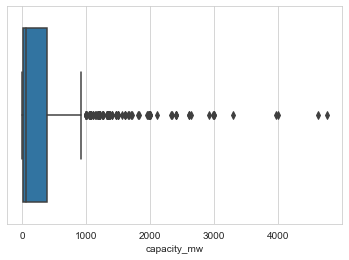

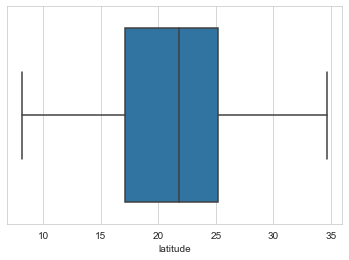

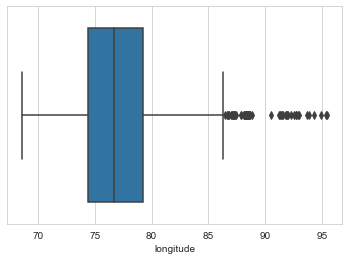

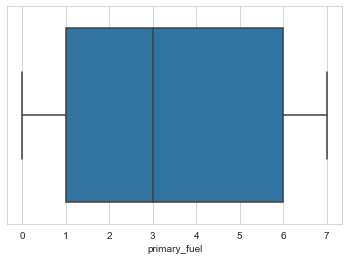

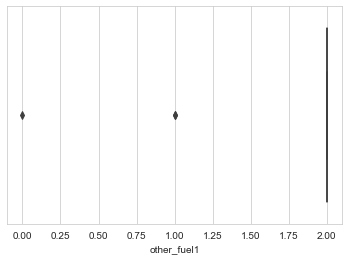

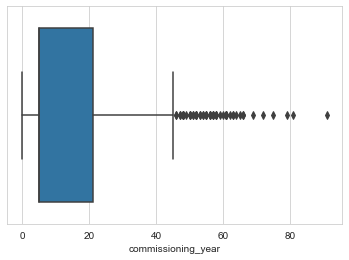

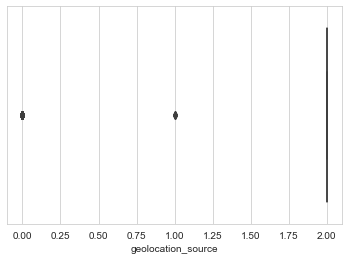

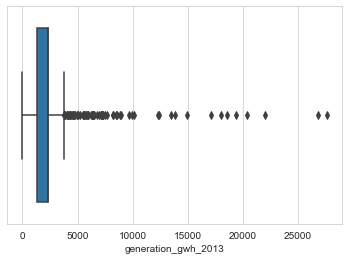

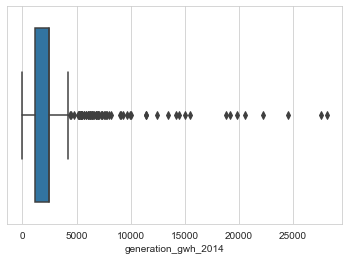

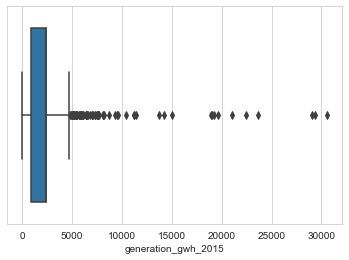

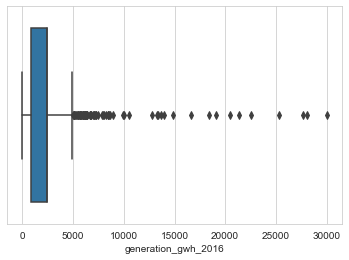

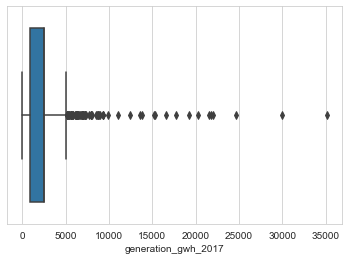

In [574]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

Some OutLiears are present in dataset.

Removing outliers

In [575]:
from scipy.stats import zscore

In [576]:
z=np.abs(zscore(df))

In [577]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
       184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
       309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
       365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
       494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
       530, 533, 539, 542, 547, 575, 584, 602, 622, 639, 649, 649, 649,
       649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696,
       696, 707, 710, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727,
       727, 727, 727, 727, 727, 729, 787, 787, 787, 787, 787, 787, 789,
       808, 809, 809, 809, 809, 809, 812, 814, 818, 819, 848, 849, 849,
       881, 881, 881, 881, 881, 881], dtype=int64), array([ 0,  9, 10, 11,  0,  7,  8,  9, 10, 11,  7,  8,  2,  2,  0,  7,  8,
        9, 10, 11,  5,  2,  2,  0,  7,  8,  9, 10, 11,  2,  2,  2,  5,  2,
        0,  0,  7,  8,  9, 10, 11,  5,  0,  2,  2,  2,  5,  5,  5,  0,  5,
  

In [578]:
df_new=df[(z<3).all(axis=1)]

In [579]:
df_new.shape

(847, 12)

In [580]:
loss_of_data=(908-847)/908*100
loss_of_data

6.71806167400881

In [581]:
df2=df.copy()

Removing Skewness

In [582]:
df.skew()

capacity_mw             3.193257
latitude               -0.161811
longitude               1.150963
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year      1.779021
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [583]:
df['capacity_mw']=np.cbrt(df['capacity_mw'])

# VIF

In [584]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [585]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [586]:
valcal()

    vif factor             features
0     6.578175          capacity_mw
1    13.963848             latitude
2   223.030363            longitude
3     4.571409         primary_fuel
4   229.904440          other_fuel1
5     2.102881   commissioning_year
6    11.300126   geolocation_source
7    29.487921  generation_gwh_2013
8    62.167047  generation_gwh_2014
9    47.752712  generation_gwh_2015
10   58.849909  generation_gwh_2016
11   27.025383  generation_gwh_2017


In [587]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [588]:
x.skew()

latitude               -0.161811
longitude               1.150963
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year      1.779021
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [589]:
from sklearn.preprocessing import power_transform,StandardScaler

In [590]:
# remove skewness
x1=power_transform(x,method='yeo-johnson')
x1=pd.DataFrame(x1)

In [591]:
x1.skew()

0     -0.077161
1      0.002567
2     -0.047088
3    -17.339637
4      0.035258
5     -2.134586
6      0.180340
7      0.124543
8      0.070937
9      0.038668
10     0.013392
dtype: float64

In [592]:
#Due to HighSkewness and Unnecessary Column
x=x.drop(['other_fuel1','geolocation_source'],axis=1)

In [593]:
x

,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,7.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,24.7663,74.6090,1,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,21.9038,69.3732,7,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,23.8712,91.3602,2,14.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,3.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,12.8932,78.1654,6,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,15.2758,75.5811,7,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,24.3500,73.7477,1,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


# Standard Scaler

In [595]:
from sklearn.preprocessing import StandardScaler

In [596]:
std=StandardScaler()

In [597]:
X=std.fit_transform(x)

In [598]:
x=X

In [599]:
x2=df.drop('primary_fuel',axis=1)
y2=df['primary_fuel']

In [600]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [601]:
ln=LinearRegression()

# Random State selection

In [602]:
for i in range(1,5000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    ln.fit(x_train,y_train)
    pred_train=ln.predict(x_train)
    pred_test=ln.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At Random state',i,'score is well')
        print('Train score',r2_score(y_train,pred_train))
        print('Test Score',r2_score(y_test,pred_test))

At Random state 3888 score is well
Train score 0.44571758196622746
Test Score 0.4457229014477333
At Random state 4121 score is well
Train score 0.4529784201324346
Test Score 0.45301734608498934


In [603]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3888)

In [604]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [605]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor()

In [606]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred))

In [607]:
fun(ln)

Taining Score:- 44.72052868458316
Mean Absolute Error 1.996885558745583
Mean Squared Error 6.0640803300271795
Root Mean Squared Erro 2.46253534594474
R2 Score 0.46804292466705066


In [608]:
fun(svr)

Taining Score:- 66.97029067672841
Mean Absolute Error 1.5571974945324696
Mean Squared Error 4.505905411497271
Root Mean Squared Erro 2.1227118060389807
R2 Score 0.6047301265852039


In [609]:
fun(svrl)

Taining Score:- 43.95440726786987
Mean Absolute Error 2.027466961152599
Mean Squared Error 6.425005677013421
Root Mean Squared Erro 2.53475949096032
R2 Score 0.4363816039807743


In [610]:
fun(svrp)

Taining Score:- 48.76869832823242
Mean Absolute Error 2.164426187793277
Mean Squared Error 31.17726821984758
Root Mean Squared Erro 5.583660826003634
R2 Score -1.7349519657544992


In [611]:
fun(dtc)

Taining Score:- 99.86251262363817
Mean Absolute Error 1.0651032291096922
Mean Squared Error 2.241868140382888
Root Mean Squared Erro 1.4972869265384268
R2 Score 0.8033374305193524


In [612]:
fun(knn)

Taining Score:- 80.79278051736347
Mean Absolute Error 1.0817526349822808
Mean Squared Error 2.383735268196641
Root Mean Squared Erro 1.5439349948092507
R2 Score 0.7908924729510954


# Ensemble Method

In [613]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [614]:
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
sgd=SGDRegressor()

In [615]:
fun(rf)

Taining Score:- 97.83473170269758
Mean Absolute Error 0.8085680821945275
Mean Squared Error 1.2122067004149668
Root Mean Squared Erro 1.1010025887412649
R2 Score 0.8936620400856629


In [616]:
fun(ad)

Taining Score:- 80.65492313517578
Mean Absolute Error 1.256393515623025
Mean Squared Error 2.1854932100151667
Root Mean Squared Erro 1.478341371272267
R2 Score 0.8082827876796156


In [617]:
fun(gd)

Taining Score:- 93.3530971888866
Mean Absolute Error 0.7823032385499614
Mean Squared Error 1.0900560670901032
Root Mean Squared Erro 1.0440575018120903
R2 Score 0.9043774149021555


In [618]:
fun(sgd)

Taining Score:- 44.530820654054125
Mean Absolute Error 1.979306180229982
Mean Squared Error 5.871132278337864
Root Mean Squared Erro 2.4230419472922593
R2 Score 0.4849688352226218


# Regulization

In [619]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [620]:
ls=Lasso(alpha=0.0001,normalize=False)
rd=Ridge(alpha=0.0001)
es=ElasticNet(alpha=0.0001)

In [621]:
fun(ls)

Taining Score:- 44.720516635164266
Mean Absolute Error 1.996809645185908
Mean Squared Error 6.063104803676374
Root Mean Squared Erro 2.4623372644047716
R2 Score 0.46812850040421805


In [622]:
fun(rd)

Taining Score:- 44.720528684574745
Mean Absolute Error 1.9968854876103237
Mean Squared Error 6.064079383127624
Root Mean Squared Erro 2.462535153683623
R2 Score 0.46804300773157004


In [623]:
fun(es)

Taining Score:- 44.72052185552102
Mean Absolute Error 1.9968218285756758
Mean Squared Error 6.063249874592292
Root Mean Squared Erro 2.462366722198847
R2 Score 0.4681157744019312


# Hyper Tunning

Random Forest

In [625]:
p1={'criterion':['mse','absolute_error','possion'],'n_estimators':[10,50,75,100,200,250,500],'max_features':['auto','log2','sqrt'],'bootstrap':['True','False']}

In [626]:
gd1=GridSearchCV(rf,p1)
gd1.fit(x,y)
print(gd1.best_params_)

{'bootstrap': 'True', 'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 100}


In [627]:
rf1=RandomForestRegressor(criterion='mse',n_estimators=100,max_features='log2',bootstrap=True)

In [628]:
fun(rf1)

Taining Score:- 98.02601078188323
Mean Absolute Error 0.7975102151526183
Mean Squared Error 1.1593938927204273
Root Mean Squared Erro 1.0767515464211914
R2 Score 0.8982949184765042


KNeighborsNeighbors

In [629]:
p2={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [630]:
gd2=GridSearchCV(knn,p2)
gd2.fit(x,y)
print(gd2.best_params_)

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [631]:
knn1=KNeighborsRegressor(n_neighbors=2,algorithm='auto',p=1,weights='distance')

In [632]:
fun(knn1)

Taining Score:- 99.84623785838852
Mean Absolute Error 0.9513176405302708
Mean Squared Error 2.017712836531788
Root Mean Squared Erro 1.4204621911658852
R2 Score 0.8230009233109238


GradientBoostingRegressor

In [635]:
p3={'learning_rate':[10,1,0.1,0.01,0.001,0.0001],'n_estimators':[50,100,250,500,750],'criterion':['friedman_mse','squared_error','mse','mae'],'max_features':['auto','sqrt','log2']}

In [636]:
gd3=GridSearchCV(gd,p3)
gd3.fit(x,y)
print(gd3.best_params_)

{'criterion': 'mae', 'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 750}


In [637]:
gd2=GradientBoostingRegressor(criterion='mae',learning_rate=0.1,n_estimators=750,max_features='log2')

In [638]:
fun(gd2)

Taining Score:- 95.43017876748112
Mean Absolute Error 0.7495042833282459
Mean Squared Error 1.0369492798781201
Root Mean Squared Erro 1.018307065613374
R2 Score 0.9090360819494454


# Cross Validation

In [639]:
from sklearn.model_selection import cross_val_score

In [640]:
for i in range(2,11):
    score=cross_val_score(rf1,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.8530746659271371
At CV= 3 0.8619513554257704
At CV= 4 0.8666294306906186
At CV= 5 0.870224874412447
At CV= 6 0.8699365372068053
At CV= 7 0.8636989809277764
At CV= 8 0.8703521015309469
At CV= 9 0.869743504123351
At CV= 10 0.869819486734646


In [641]:
for i in range(2,11):
    score=cross_val_score(gd2,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.8500893309404953
At CV= 3 0.8613354882420338
At CV= 4 0.863549209443608
At CV= 5 0.862246153710279
At CV= 6 0.8635129928713404
At CV= 7 0.8514350125030904
At CV= 8 0.8629962802897421
At CV= 9 0.8594652712589236
At CV= 10 0.8598508919884263


In [642]:
for i in range(2,11):
    score=cross_val_score(knn1,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.7172041841666438
At CV= 3 0.7431882501250328
At CV= 4 0.7412096698975041
At CV= 5 0.7355840918774208
At CV= 6 0.7528754899699709
At CV= 7 0.7320109713214317
At CV= 8 0.7434563481136954
At CV= 9 0.7480446679015816
At CV= 10 0.7385110151892244


On Basis Of r2_scrore,RMSE and CV score we select RandomForest as best model to save.

# Saving Model

In [747]:
import pickle
filename='powerPlant_capacity_Prediction.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion

        Actual    Predict
275   9.205164   8.063510
256   2.884499   2.763367
157   1.709976   1.708227
794   4.594701   4.837334
455   3.983263   3.806332
..         ...        ...
792   6.036811   5.607547
741  10.469298  10.444579
727  14.390374  14.815454
829   4.198336   2.612405
223   7.767087   5.502842

[182 rows x 2 columns]


Text(0.5, 1.0, 'Random Forest Regressor')

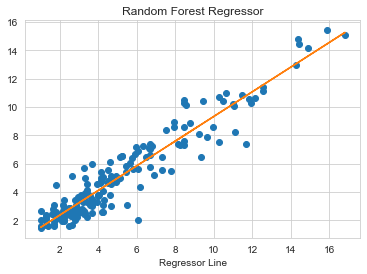

In [644]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rf1.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(rf1.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('Random Forest Regressor')

# Consider Primary Fuel As Target Variable

In [645]:
df2

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,7.0,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2,14.0,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,3.0,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2.0,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2,5.0,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [654]:
x2=df2.drop('primary_fuel',axis=1)
y2=df2['primary_fuel']

In [655]:
x2.skew()

capacity_mw             3.193257
latitude               -0.161811
longitude               1.150963
other_fuel1           -20.464435
commissioning_year      1.779021
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [659]:
# remove skewness
x3=power_transform(x2,method='yeo-johnson')
x4=pd.DataFrame(x3)

In [660]:
x2=x4

# STANDARD SCALER

In [663]:
from sklearn.preprocessing import StandardScaler

In [664]:
std=StandardScaler()
X2=std.fit_transform(x2)

In [665]:
X2

array([[-1.69572307,  1.15407872, -0.94566101, ...,  0.31414141,
         0.31812958,  0.31588978],
       [ 0.19251109,  0.5723039 , -0.53458397, ...,  0.31414141,
         0.31812958,  0.31588978],
       [-0.29492012,  0.09296396, -2.39087749, ...,  0.31414141,
         0.31812958,  0.31588978],
       ...,
       [-0.52559321, -0.98425999, -0.2685914 , ...,  0.31414141,
         0.31812958,  0.31588978],
       [ 0.08531829,  0.50212316, -0.78805285, ...,  0.31414141,
         0.31812958,  0.31588978],
       [-0.75867669, -1.81038883,  0.19542302, ...,  0.31414141,
         0.31812958,  0.31588978]])

In [666]:
x2=X2

# SMOTE

In [667]:
y2.value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [693]:
from imblearn.over_sampling import SMOTE

In [694]:
smt=SMOTE()
trainx2,trainy2=smt.fit_resample(x2,y2)

In [695]:
trainy.value_counts()

7    259
5    259
3    259
1    259
6    259
4    259
2    259
0    259
Name: primary_fuel, dtype: int64

In [696]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [697]:
lg=LogisticRegression()

# Random state selection

In [698]:
x2_train,x2_test,y2_train,y2_test=train_test_split(trainx2,trainy2,test_size=0.25,random_state=500)

In [699]:
x2_test.shape

(518, 11)

In [700]:
y2_test.shape

(518,)

In [701]:
x2_train.shape

(1554, 11)

In [702]:
y2_train.shape

(1554,)

In [703]:
def fun(f):
    f.fit(x2_train,y2_train)
    pred=f.predict(x2_test)
    print("Accuracy Score",accuracy_score(y2_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y2_test,pred))
    print('Classification Report',classification_report(y2_test,pred))
    print('f1 score',f1_score(y2_test,pred,average='micro'))

In [704]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [705]:
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [706]:
fun(lg)

Accuracy Score 0.581081081081081
Confusion Matrix
 [[40  0  0  0  0  0  0 29]
 [ 9 23  7  1 12  1  0  2]
 [ 2 10 24  7  6  6  0  8]
 [ 2  8  9 46  4 12  0  0]
 [ 0  4  0  3 45  3  0  0]
 [ 0  1  3  2  0 34  0 20]
 [ 2  0  0  0  0  0 65  0]
 [38  6  0  0  0  0  0 24]]
Classification Report               precision    recall  f1-score   support

           0       0.43      0.58      0.49        69
           1       0.44      0.42      0.43        55
           2       0.56      0.38      0.45        63
           3       0.78      0.57      0.66        81
           4       0.67      0.82      0.74        55
           5       0.61      0.57      0.59        60
           6       1.00      0.97      0.98        67
           7       0.29      0.35      0.32        68

    accuracy                           0.58       518
   macro avg       0.60      0.58      0.58       518
weighted avg       0.60      0.58      0.58       518

f1 score 0.581081081081081


In [707]:
fun(svc)

Accuracy Score 0.7722007722007722
Confusion Matrix
 [[69  0  0  0  0  0  0  0]
 [ 8 33  2  2  7  1  0  2]
 [ 5  9 35  0  0 14  0  0]
 [ 0  7  8 61  2  3  0  0]
 [ 0  0  0  0 55  0  0  0]
 [12  1  0  1  0 46  0  0]
 [ 2  0  0  0  0  0 65  0]
 [28  4  0  0  0  0  0 36]]
Classification Report               precision    recall  f1-score   support

           0       0.56      1.00      0.72        69
           1       0.61      0.60      0.61        55
           2       0.78      0.56      0.65        63
           3       0.95      0.75      0.84        81
           4       0.86      1.00      0.92        55
           5       0.72      0.77      0.74        60
           6       1.00      0.97      0.98        67
           7       0.95      0.53      0.68        68

    accuracy                           0.77       518
   macro avg       0.80      0.77      0.77       518
weighted avg       0.81      0.77      0.77       518

f1 score 0.7722007722007722


In [708]:
fun(svcl)

Accuracy Score 0.7065637065637066
Confusion Matrix
 [[69  0  0  0  0  0  0  0]
 [ 6 34  7  1  6  0  0  1]
 [ 2 10 32  5  3  8  0  3]
 [ 2  9 15 47  3  5  0  0]
 [ 0  1  0  0 54  0  0  0]
 [ 0  1  0  1  0 45  0 13]
 [ 0  2  0  0  0  0 65  0]
 [38 10  0  0  0  0  0 20]]
Classification Report               precision    recall  f1-score   support

           0       0.59      1.00      0.74        69
           1       0.51      0.62      0.56        55
           2       0.59      0.51      0.55        63
           3       0.87      0.58      0.70        81
           4       0.82      0.98      0.89        55
           5       0.78      0.75      0.76        60
           6       1.00      0.97      0.98        67
           7       0.54      0.29      0.38        68

    accuracy                           0.71       518
   macro avg       0.71      0.71      0.70       518
weighted avg       0.72      0.71      0.69       518

f1 score 0.7065637065637066


In [709]:
fun(svcp)

Accuracy Score 0.7065637065637066
Confusion Matrix
 [[69  0  0  0  0  0  0  0]
 [20 26  2  1  6  0  0  0]
 [16  6 38  0  0  3  0  0]
 [ 7  5  7 57  2  1  0  2]
 [ 5  6  0  0 44  0  0  0]
 [22  0  0  0  0 38  0  0]
 [ 2  0  0  0  0  0 65  0]
 [39  0  0  0  0  0  0 29]]
Classification Report               precision    recall  f1-score   support

           0       0.38      1.00      0.55        69
           1       0.60      0.47      0.53        55
           2       0.81      0.60      0.69        63
           3       0.98      0.70      0.82        81
           4       0.85      0.80      0.82        55
           5       0.90      0.63      0.75        60
           6       1.00      0.97      0.98        67
           7       0.94      0.43      0.59        68

    accuracy                           0.71       518
   macro avg       0.81      0.70      0.72       518
weighted avg       0.81      0.71      0.72       518

f1 score 0.7065637065637066


In [710]:
fun(dtc)

Accuracy Score 0.8552123552123552
Confusion Matrix
 [[65  1  0  0  0  0  0  3]
 [ 3 29  7  7  2  0  0  7]
 [ 0  4 48  3  0  4  0  4]
 [ 0  2 10 66  2  0  0  1]
 [ 0  5  0  0 50  0  0  0]
 [ 0  0  3  0  0 57  0  0]
 [ 0  0  0  0  0  0 66  1]
 [ 4  1  1  0  0  0  0 62]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.94      0.92        69
           1       0.69      0.53      0.60        55
           2       0.70      0.76      0.73        63
           3       0.87      0.81      0.84        81
           4       0.93      0.91      0.92        55
           5       0.93      0.95      0.94        60
           6       1.00      0.99      0.99        67
           7       0.79      0.91      0.85        68

    accuracy                           0.86       518
   macro avg       0.85      0.85      0.85       518
weighted avg       0.85      0.86      0.85       518

f1 score 0.8552123552123552


In [711]:
fun(knn)

Accuracy Score 0.8513513513513513
Confusion Matrix
 [[69  0  0  0  0  0  0  0]
 [ 4 28  6  3  7  2  0  5]
 [ 2  7 45  1  0  7  0  1]
 [ 0  7 12 61  1  0  0  0]
 [ 0  1  0  1 53  0  0  0]
 [ 0  0  1  0  0 59  0  0]
 [ 0  0  0  0  0  0 66  1]
 [ 8  0  0  0  0  0  0 60]]
Classification Report               precision    recall  f1-score   support

           0       0.83      1.00      0.91        69
           1       0.65      0.51      0.57        55
           2       0.70      0.71      0.71        63
           3       0.92      0.75      0.83        81
           4       0.87      0.96      0.91        55
           5       0.87      0.98      0.92        60
           6       1.00      0.99      0.99        67
           7       0.90      0.88      0.89        68

    accuracy                           0.85       518
   macro avg       0.84      0.85      0.84       518
weighted avg       0.85      0.85      0.85       518

f1 score 0.8513513513513514


In [712]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [713]:
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [714]:
fun(rfc)

Accuracy Score 0.88996138996139
Confusion Matrix
 [[67  0  0  0  0  0  0  2]
 [ 2 32  5  5  3  1  0  7]
 [ 0  5 51  3  0  2  0  2]
 [ 0  4  7 67  1  2  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0 60  0  0]
 [ 0  0  0  0  0  0 66  1]
 [ 5  0  0  0  0  0  0 63]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.97      0.94        69
           1       0.78      0.58      0.67        55
           2       0.81      0.81      0.81        63
           3       0.89      0.83      0.86        81
           4       0.93      1.00      0.96        55
           5       0.92      1.00      0.96        60
           6       1.00      0.99      0.99        67
           7       0.84      0.93      0.88        68

    accuracy                           0.89       518
   macro avg       0.89      0.89      0.88       518
weighted avg       0.89      0.89      0.89       518

f1 score 0.88996138996139


In [715]:
fun(adc)

Accuracy Score 0.4826254826254826
Confusion Matrix
 [[ 0  0  0  0  0  0  0 69]
 [ 0  9  1  3 16  0  0 26]
 [ 0  1  1 40  3  0  0 18]
 [ 0  1  2 66  3  0  0  9]
 [ 0  7  0  7 41  0  0  0]
 [ 0  0  0 39  0  0  0 21]
 [ 0  0  0  0  0  0 65  2]
 [ 0  0  0  0  0  0  0 68]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.50      0.16      0.25        55
           2       0.25      0.02      0.03        63
           3       0.43      0.81      0.56        81
           4       0.65      0.75      0.69        55
           5       0.00      0.00      0.00        60
           6       1.00      0.97      0.98        67
           7       0.32      1.00      0.48        68

    accuracy                           0.48       518
   macro avg       0.39      0.46      0.37       518
weighted avg       0.39      0.48      0.38       518

f1 score 0.4826254826254826


In [716]:
fun(gbc)

Accuracy Score 0.8918918918918919
Confusion Matrix
 [[66  0  0  0  0  0  0  3]
 [ 4 37  4  4  2  1  0  3]
 [ 1  6 47  3  1  3  0  2]
 [ 0  2  5 72  0  2  0  0]
 [ 0  0  0  0 54  1  0  0]
 [ 0  0  0  0  0 59  0  1]
 [ 0  0  0  0  0  0 67  0]
 [ 6  2  0  0  0  0  0 60]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.96      0.90        69
           1       0.79      0.67      0.73        55
           2       0.84      0.75      0.79        63
           3       0.91      0.89      0.90        81
           4       0.95      0.98      0.96        55
           5       0.89      0.98      0.94        60
           6       1.00      1.00      1.00        67
           7       0.87      0.88      0.88        68

    accuracy                           0.89       518
   macro avg       0.89      0.89      0.89       518
weighted avg       0.89      0.89      0.89       518

f1 score 0.8918918918918919


# Hyper Tuning For Best Score

Random Forest Classifier

In [717]:
p1={'n_estimators':[10,50,100,250,500],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'bootstrap':['True','False']}

In [718]:
gd1=GridSearchCV(rfc,p1)
gd1.fit(x2,y2)
print(gd1.best_params_)

{'bootstrap': 'True', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}


In [719]:
rfc1=RandomForestClassifier(criterion='gini',n_estimators=50,bootstrap=True,max_features='sqrt')

In [720]:
fun(rfc1)

Accuracy Score 0.8996138996138996
Confusion Matrix
 [[69  0  0  0  0  0  0  0]
 [ 3 35  5  3  3  1  0  5]
 [ 0  5 52  2  0  2  0  2]
 [ 0  4  7 67  1  2  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0 60  0  0]
 [ 0  0  0  0  0  0 66  1]
 [ 6  0  0  0  0  0  0 62]]
Classification Report               precision    recall  f1-score   support

           0       0.88      1.00      0.94        69
           1       0.80      0.64      0.71        55
           2       0.81      0.83      0.82        63
           3       0.93      0.83      0.88        81
           4       0.93      1.00      0.96        55
           5       0.92      1.00      0.96        60
           6       1.00      0.99      0.99        67
           7       0.89      0.91      0.90        68

    accuracy                           0.90       518
   macro avg       0.90      0.90      0.89       518
weighted avg       0.90      0.90      0.90       518

f1 score 0.8996138996138996


# Cross Validation

In [727]:
from sklearn.model_selection import cross_val_score

In [730]:
for i in range(2,16):
    score=cross_val_score(rfc1,trainx2,trainy2,cv=i)
    print('At value of cv=',i,score.mean())

At value of cv= 2 0.8856177606177607
At value of cv= 3 0.9010675559470626
At value of cv= 4 0.9015444015444016
At value of cv= 5 0.9020406262732088
At value of cv= 6 0.8991483063863058
At value of cv= 7 0.9092664092664091
At value of cv= 8 0.903957528957529
At value of cv= 9 0.9063889411715499
At value of cv= 10 0.9039855072463767
At value of cv= 11 0.9073485616038807
At value of cv= 12 0.9097660975937627
At value of cv= 13 0.9092978955007257
At value of cv= 14 0.9083011583011583
At value of cv= 15 0.910263093872728


In [736]:
# auc roc score
from sklearn.metrics import roc_curve,roc_auc_score

In [744]:
y_pred_prob=rfc1.predict_proba(x2_test)
print('ROC score:',roc_auc_score(y2_test,y_pred_prob,multi_class='ovo'))

ROC score: 0.9863773242509088


# Saving Model On Accuracy Score and cross validation score

In [745]:
import pickle
filename='Poweplant_Primary_Fuel _Prediction.pkl'
pickle.dump(rfc1,open(filename,'wb'))

# Conclusion

In [746]:
res=pd.DataFrame()
res['Actual']=y2_test
res['Predict']=rfc1.predict(x2_test)

print(res)

      Actual  Predict
808        3        3
395        6        6
417        2        2
229        1        3
251        6        7
...      ...      ...
760        6        6
1071       0        0
589        3        3
348        0        0
488        1        7

[518 rows x 2 columns]
